In [1]:
import numpy as np
import pandas as pd
import random

from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, RFE, RFECV
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix, classification_report, precision_score, recall_score, f1_score
from scikitplot.metrics import plot_roc
from sklearn.decomposition import PCA
import missingno as msno
import plotly.express as px
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn import datasets

from varclushi import VarClusHi
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns 
import cufflinks as cf
import plotly.graph_objects as go

from functools import reduce

cf.go_offline()
pd.set_option('display.max_columns',None)
print(pd.__version__)

1.5.3


## Carga de datos

In [2]:
datos = pd.read_excel(r'C:\Users\carlo\Syngenta\Projects for Analysis - General\Data processing\Output\Customer_Churn.xlsx')
# datos = pd.read_csv("./Output/Customer_Churn1.csv")
datos

,bp_id,Estado,Territorio,FechaRegistro,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,Ship_to,Devolucion,Volumen,Consumo,Frec,Venta_2020,Venta_2021,Venta_2022,Venta_2023,Compro,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Tiempo_ultima_compra,Anio_Registro,Cliente_Nuevo,Antiguedad,percentile_75,Compra_unica,Churn
0,21293987,MIC,A9142O,2019-08-27,1001368,OI,3CR,FG,2020-01-28,2020-01-28,1,0,108.00,237859.48,2,237859.48,0.0,0.0,0.00,1,-1.0,0.0,0.0,1556,2019,False,1710,431.5,False,True
1,21107952,VER,A5542E,2017-11-17,24728,OI,3CR,FG,2020-01-30,2020-01-30,1,0,24.00,52138.70,2,52138.70,0.0,0.0,0.00,1,-1.0,0.0,0.0,1554,2017,False,2358,431.5,False,True
2,21108647,MOR,A9352B,2017-11-17,55452,OI,3CR,FG,2020-01-30,2020-01-16,1,0,1185.20,247348.89,12,247348.89,0.0,0.0,0.00,1,-1.0,0.0,0.0,1554,2017,False,2358,431.5,False,True
3,21277503,OAX,A9352E,2019-07-05,25958,OI,3CR,HS,2020-01-30,2020-01-30,1,0,1010.00,250934.31,4,250934.31,0.0,0.0,0.00,1,-1.0,0.0,0.0,1554,2019,False,1763,431.5,False,True
4,21320909,JAL,A4742A,2019-12-19,39490,OI,3ST,ST,2020-01-30,2020-01-30,1,0,87.00,307481.26,1,307481.26,0.0,0.0,0.00,1,-1.0,0.0,0.0,1554,2019,False,1596,431.5,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,25201116,MIC,A9142A,2023-03-17,13175,OI,3CR,IN,2024-12-03,2023-05-10,1,8,2707.00,3105924.97,15,0.00,0.0,0.0,-641163.78,1,0.0,0.0,0.0,215,2023,False,412,431.5,False,False
554,26005072,PUE,A9512E,2023-04-07,13175,OI,3CR,FG,2024-12-03,2023-10-14,1,0,1035.20,986696.69,47,0.00,0.0,0.0,662931.39,1,0.0,0.0,0.0,215,2023,False,391,431.5,False,False
555,26011524,SIN,A9492D,2023-07-08,27196,OI,3CR,IN,2024-12-03,2023-04-10,1,1,2430.79,1094863.34,52,0.00,0.0,0.0,892363.51,1,0.0,0.0,0.0,215,2023,False,299,431.5,False,False
556,26019912,MIC,A9472J,2023-09-21,72341,OI,3CR,NU,2024-12-03,2023-05-10,1,2,2259.20,836557.57,48,0.00,0.0,0.0,295280.37,1,0.0,0.0,0.0,215,2023,False,224,431.5,False,False


## Análisis Exploratorio de datos

Obtenemos información acerca de los campos del nuetro conjunto de datos.

In [3]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   bp_id                 558 non-null    int64         
 1   Estado                558 non-null    object        
 2   Territorio            558 non-null    object        
 3   FechaRegistro         558 non-null    datetime64[ns]
 4   Material.Number       558 non-null    int64         
 5   Temporada             558 non-null    object        
 6   SO                    558 non-null    object        
 7   Linea_Negocio         558 non-null    object        
 8   Date_Last             558 non-null    datetime64[ns]
 9   CohortDay             558 non-null    datetime64[ns]
 10  Ship_to               558 non-null    int64         
 11  Devolucion            558 non-null    int64         
 12  Volumen               558 non-null    float64       
 13  Consumo             

In [4]:
datos["y"] = (datos["Churn"]==True).astype(int)

In [5]:
datos.dtypes

bp_id                            int64
Estado                          object
Territorio                      object
FechaRegistro           datetime64[ns]
Material.Number                  int64
Temporada                       object
SO                              object
Linea_Negocio                   object
Date_Last               datetime64[ns]
CohortDay               datetime64[ns]
Ship_to                          int64
Devolucion                       int64
Volumen                        float64
Consumo                        float64
Frec                             int64
Venta_2020                     float64
Venta_2021                     float64
Venta_2022                     float64
Venta_2023                     float64
Compro                           int64
Crecimiento_21vs20             float64
Crecimiento_22vs21             float64
Crecimiento_23vs22             float64
Tiempo_ultima_compra             int64
Anio_Registro                    int64
Cliente_Nuevo            

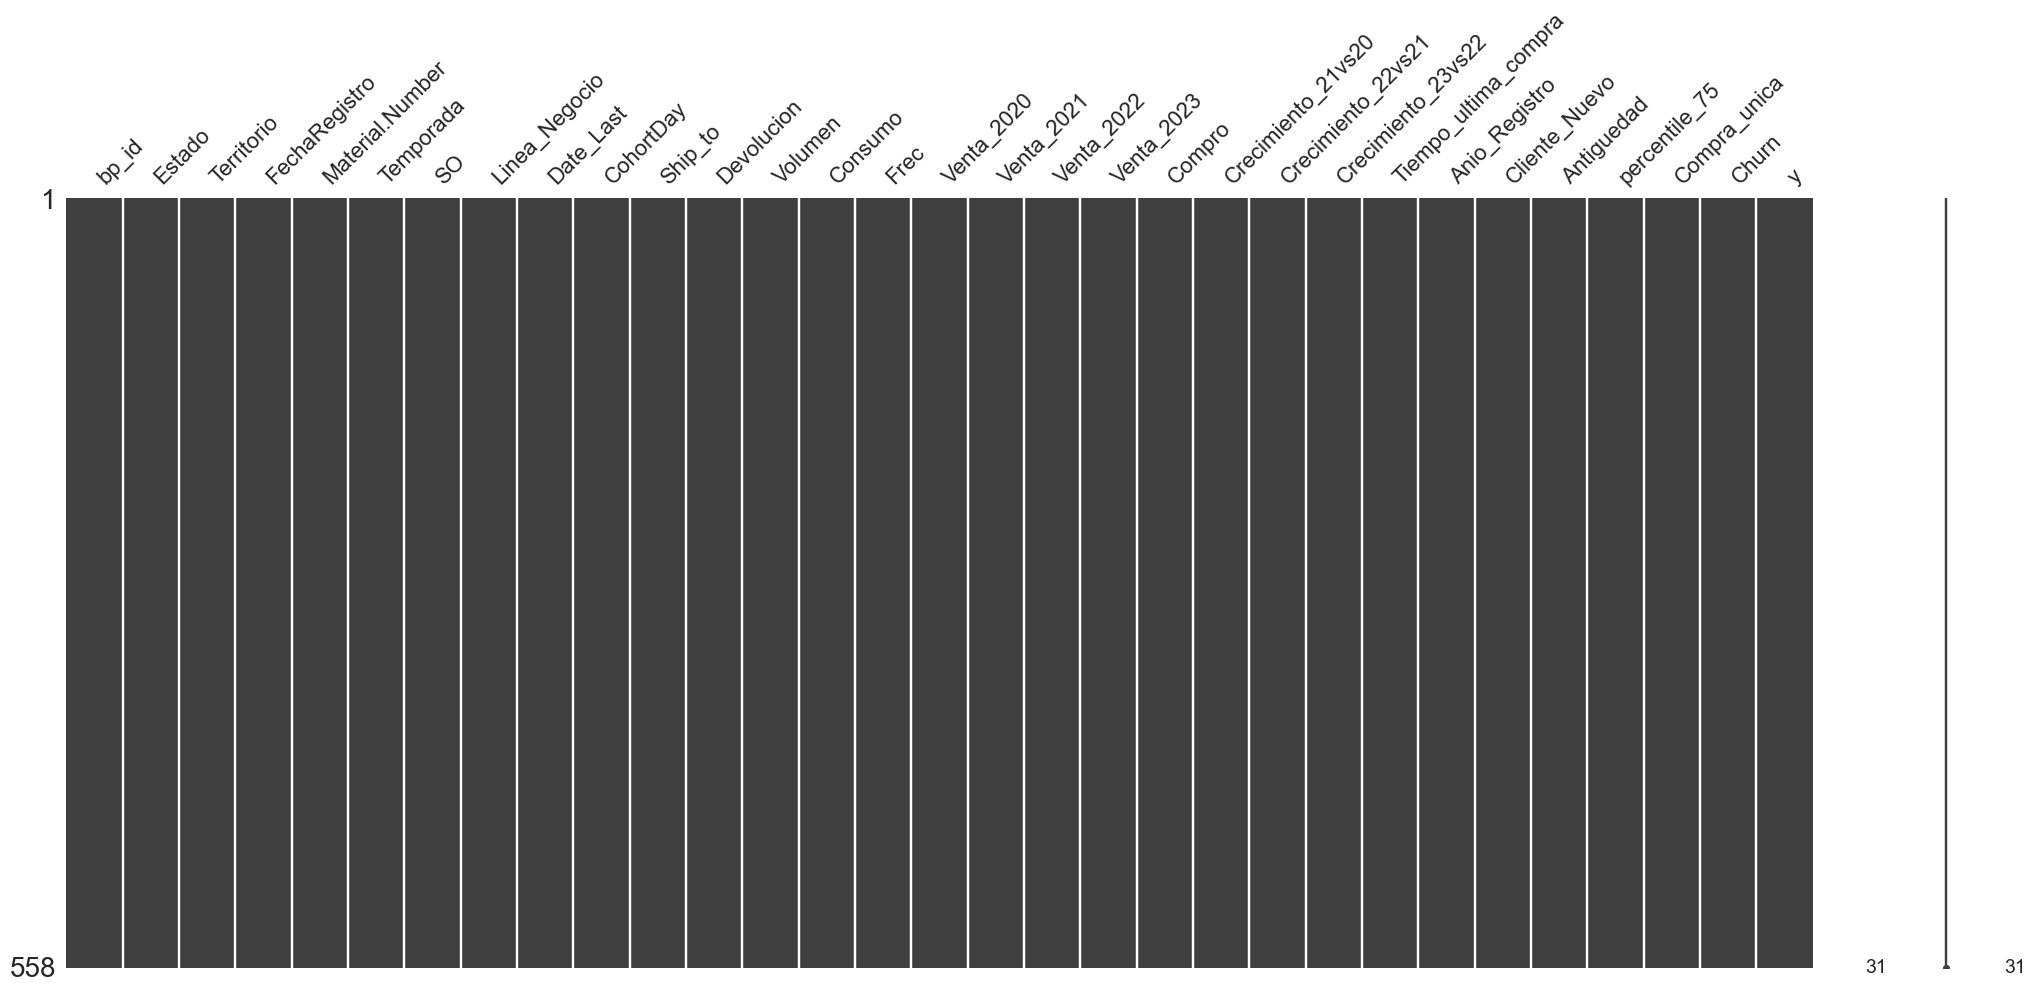

In [6]:
msno.matrix(datos);

In [7]:
datos.tail()

,bp_id,Estado,Territorio,FechaRegistro,Material.Number,Temporada,SO,Linea_Negocio,Date_Last,CohortDay,Ship_to,Devolucion,Volumen,Consumo,Frec,Venta_2020,Venta_2021,Venta_2022,Venta_2023,Compro,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Tiempo_ultima_compra,Anio_Registro,Cliente_Nuevo,Antiguedad,percentile_75,Compra_unica,Churn,y
553,25201116,MIC,A9142A,2023-03-17,13175,OI,3CR,IN,2024-12-03,2023-05-10,1,8,2707.00,3105924.97,15,0.0,0.0,0.0,-641163.78,1,0.0,0.0,0.0,215,2023,False,412,431.5,False,False,0
554,26005072,PUE,A9512E,2023-04-07,13175,OI,3CR,FG,2024-12-03,2023-10-14,1,0,1035.20,986696.69,47,0.0,0.0,0.0,662931.39,1,0.0,0.0,0.0,215,2023,False,391,431.5,False,False,0
555,26011524,SIN,A9492D,2023-07-08,27196,OI,3CR,IN,2024-12-03,2023-04-10,1,1,2430.79,1094863.34,52,0.0,0.0,0.0,892363.51,1,0.0,0.0,0.0,215,2023,False,299,431.5,False,False,0
556,26019912,MIC,A9472J,2023-09-21,72341,OI,3CR,NU,2024-12-03,2023-05-10,1,2,2259.20,836557.57,48,0.0,0.0,0.0,295280.37,1,0.0,0.0,0.0,215,2023,False,224,431.5,False,False,0
557,26041032,BCN,A9572B,2024-01-23,39261,OI,3CR,FG,2024-12-03,2024-02-28,1,0,250.80,323877.93,9,0.0,0.0,0.0,0.00,1,0.0,0.0,0.0,215,2024,True,100,431.5,False,False,0


# Data Manipulation

Ahora transformamos la información para su posterior en los algoritmos de ML.

In [8]:
datos['bp_id'] = datos['bp_id'].astype('str')
datos.columns.values

array(['bp_id', 'Estado', 'Territorio', 'FechaRegistro',
       'Material.Number', 'Temporada', 'SO', 'Linea_Negocio', 'Date_Last',
       'CohortDay', 'Ship_to', 'Devolucion', 'Volumen', 'Consumo', 'Frec',
       'Venta_2020', 'Venta_2021', 'Venta_2022', 'Venta_2023', 'Compro',
       'Crecimiento_21vs20', 'Crecimiento_22vs21', 'Crecimiento_23vs22',
       'Tiempo_ultima_compra', 'Anio_Registro', 'Cliente_Nuevo',
       'Antiguedad', 'percentile_75', 'Compra_unica', 'Churn', 'y'],
      dtype=object)

In [9]:
datos['ID'] = datos['bp_id']
datos['Churn'].value_counts(1)

False    0.749104
True     0.250896
Name: Churn, dtype: float64

## Data Visualization

Distribución de Abandono

In [10]:
# Crear un DataFrame con los valores y etiquetas
labels = [False, True]
value_counts = datos['y'].value_counts()
total = len(datos['y'])

# Calcular las proporciones y porcentajes
proportions = value_counts / total
percentages = (value_counts / total) * 100

# Crear una lista de etiquetas personalizada con conteo y porcentaje
custom_labels = [f'{label} ({count}, {percent:.2f}%)' for label, count, percent in zip(labels, value_counts, percentages)]

# Crear la figura
fig = go.Figure(data=[go.Pie(labels=custom_labels, values=proportions, hole=0.5)])

fig.update_traces(
    hoverinfo='label+percent',
    textinfo='label+percent',
    textfont_size=20,
    marker=dict(
        colors=['#ffb300', '#5f7800', '#abb400'],
        line=dict(color='#000000', width=2)
    ),
    pull=[0.1, 0.1]  # Controla la posición de las etiquetas por fuera de la gráfica
)

fig.update_layout(
    title={
        'text': "Distribución de Churn",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font=dict(
        family="Arial, monospace",
        size=20,
        color="#000000"
    )
)

fig.show()


Clientes nuevos por Churn

In [11]:
# Define el mapeo de colores
color_map = {"Yes": "#5f7800", "No": "#ffb300"}

# Crea el histograma
fig = px.histogram(
    datos, 
    x="y", 
    color="Cliente_Nuevo", 
    barmode="group", 
    title="<b>Distribución de Cliente Nuevo</b>"
)

# Ajusta el ancho, alto y espacio entre las barras
fig.update_layout(width=700, height=500, bargap=0.1)

# Cambia el nombre del eje x a "Churn"
fig.update_xaxes(title_text="Churn")

# Cambia los colores de las barras y agrega contornos negros
fig.update_traces(
    marker=dict(color=[color_map[value] for value in color_map], line=dict(color="black", width=2))
)

# Muestra el gráfico
fig.show()


La distribución de antiguedad por bp_id

C:\Users\carlo\AppData\Local\Temp\ipykernel_28032\235660633.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\carlo\AppData\Local\Temp\ipykernel_28032\235660633.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




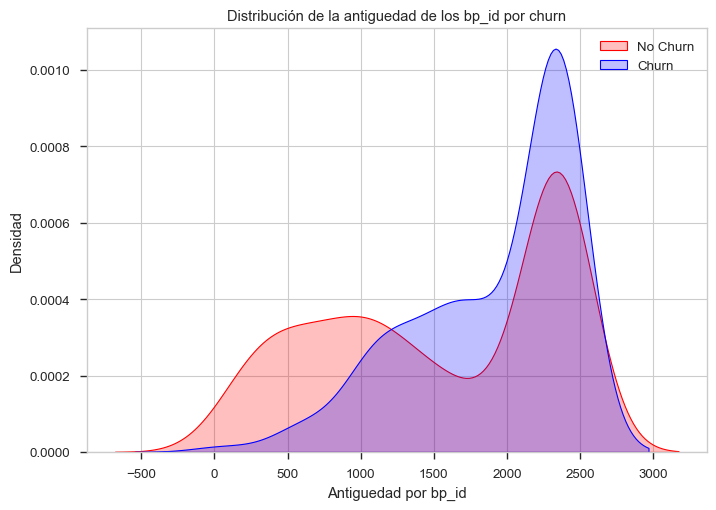

In [12]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(datos.Antiguedad[(datos["y"] == 0) ],
                color="Red", shade = True);
ax = sns.kdeplot(datos.Antiguedad[(datos["y"] == 1) ],
                ax =ax, color="Blue", shade= True);
ax.legend(["No Churn","Churn"],loc='upper right');
ax.set_ylabel('Densidad');
ax.set_xlabel('Antiguedad por bp_id');
ax.set_title('Distribución de la antiguedad de los bp_id por churn');

Creamos los vectores de variables continuas y categoricas

In [13]:
datos['Anio_Registro'] = datos['Anio_Registro'].astype('str')
datos.columns.values

array(['bp_id', 'Estado', 'Territorio', 'FechaRegistro',
       'Material.Number', 'Temporada', 'SO', 'Linea_Negocio', 'Date_Last',
       'CohortDay', 'Ship_to', 'Devolucion', 'Volumen', 'Consumo', 'Frec',
       'Venta_2020', 'Venta_2021', 'Venta_2022', 'Venta_2023', 'Compro',
       'Crecimiento_21vs20', 'Crecimiento_22vs21', 'Crecimiento_23vs22',
       'Tiempo_ultima_compra', 'Anio_Registro', 'Cliente_Nuevo',
       'Antiguedad', 'percentile_75', 'Compra_unica', 'Churn', 'y', 'ID'],
      dtype=object)

In [14]:
vard = ['Territorio',
        'Estado',
        'Cliente_Nuevo',
        'Anio_Registro',
        'Compra_unica',
        'Material.Number',
        'Temporada',
        'SO',
        'Churn',
        'Linea_Negocio'
    ]

varc = [
            'Antiguedad',
            'Volumen',
            'Consumo',
            # 'N_Material',
            'Ship_to',
            'Frec',
            'Tiempo_ultima_compra',
            'Devolucion',
            'Venta_2020',
            'Venta_2021',
            'Venta_2022',
            'Venta_2023',
            'Crecimiento_21vs20',
            'Crecimiento_22vs21',
            'Crecimiento_23vs22'
    ]

vart = ['y']
um = ['ID']

In [15]:
datos = datos[um+vart+varc+vard]

Distribución de cada una de las variables numericas para el modelo.

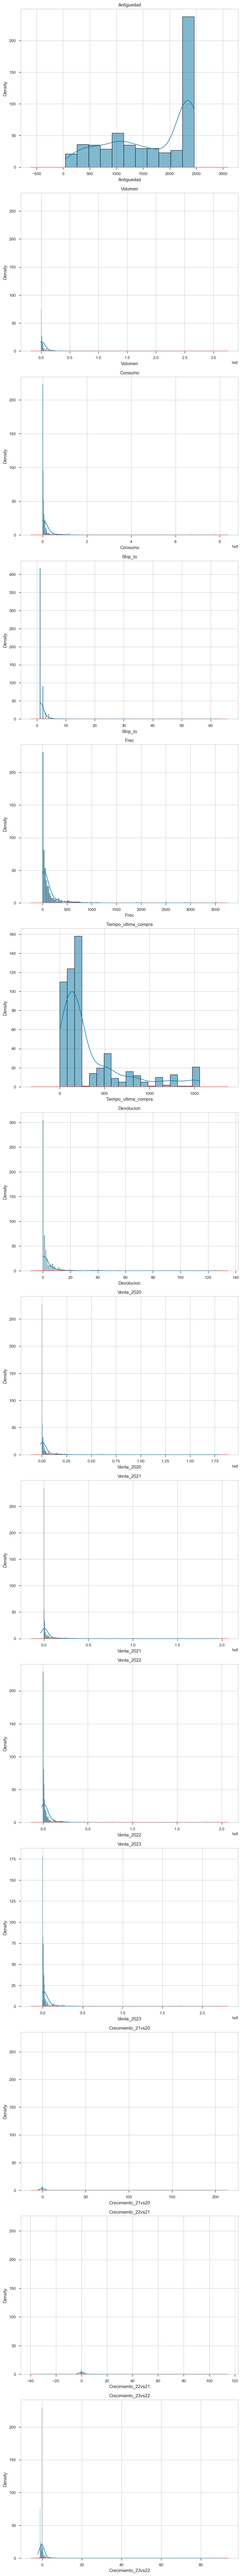

In [16]:
fig, axes = plt.subplots(len(varc), 1, figsize=(8, 6*len(varc)))

for i, feat in enumerate(varc):
    ax = axes[i]
    sns.kdeplot(datos[feat], ax=ax, color='red')
    sns.histplot(datos[feat], ax=ax, kde=True)
    ax.set_title(feat)

plt.tight_layout()
plt.show()

¿Los nuevos clientes son más propensos a abandonar?

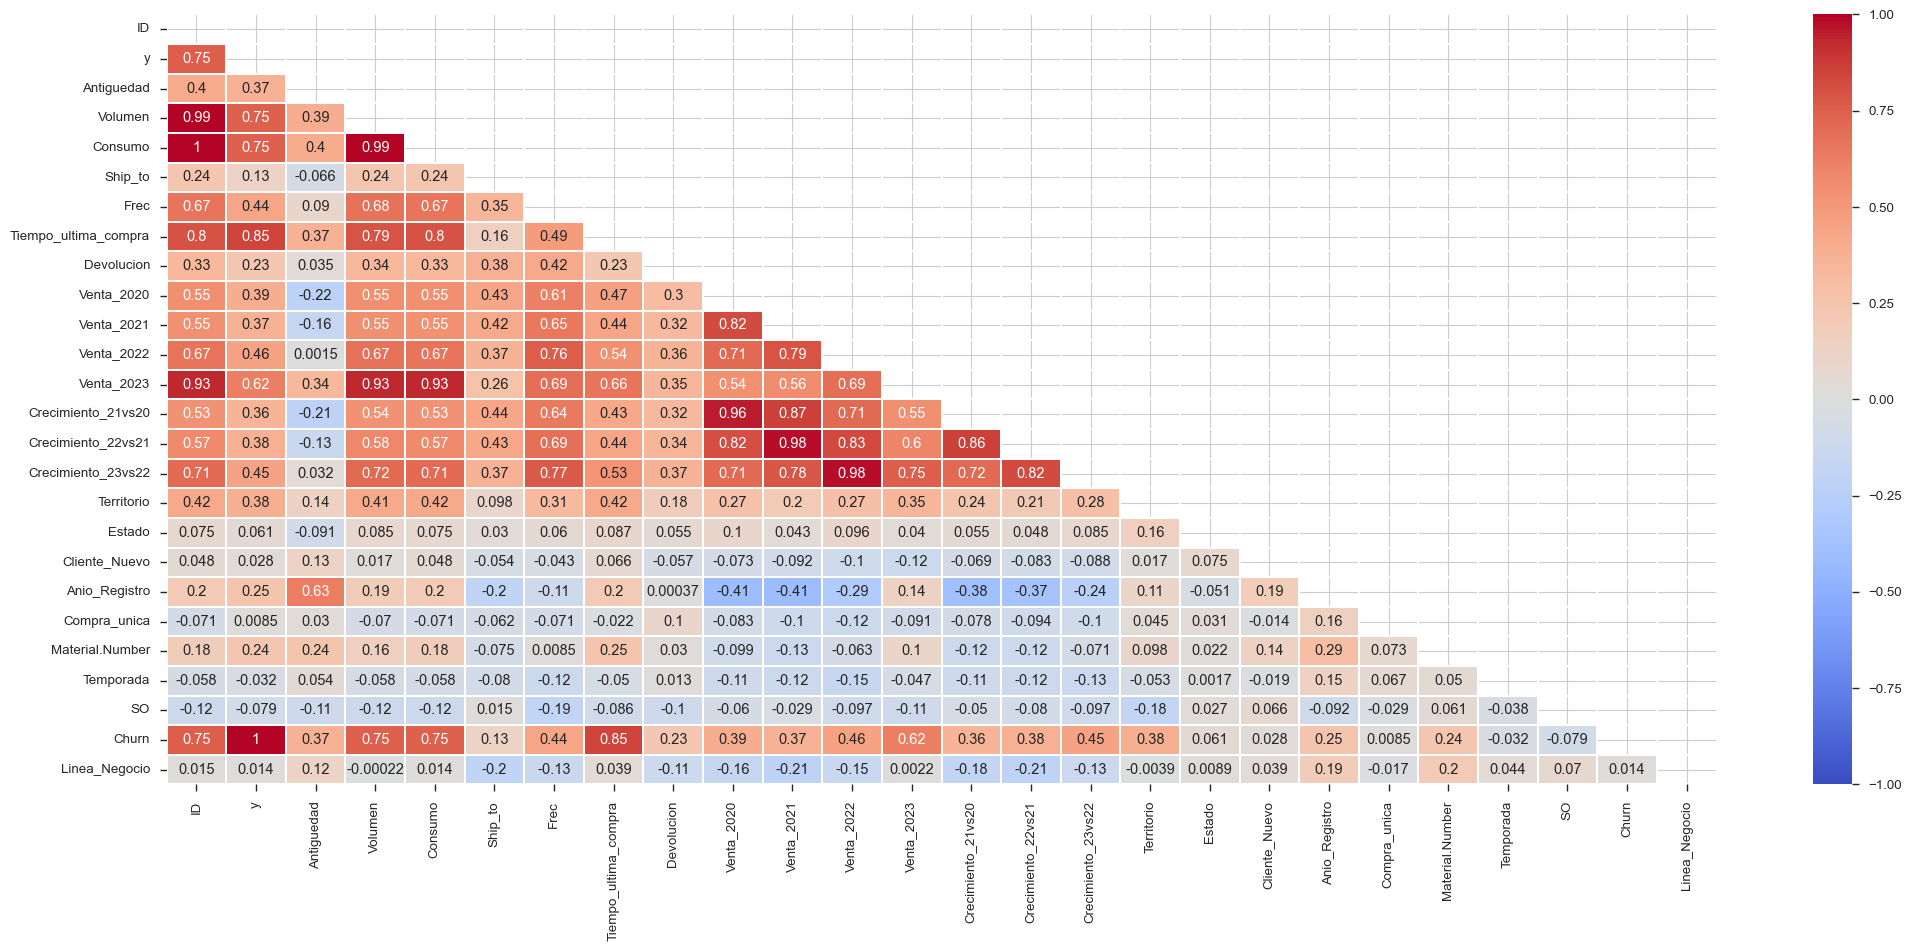

In [17]:
plt.figure(figsize=(25, 10))

corr = datos.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

## Preparación de los datos.

### Dividir los datos en conjunto de entrenamiento y conjunto de prueba

In [18]:
train, valid = train_test_split(datos,train_size=0.7)
train.reset_index(drop=True,inplace=True),valid.reset_index(drop=True,inplace=True)
train.shape,valid.shape

((390, 26), (168, 26))

In [19]:
# Normalizar las variables numéricas en el conjunto de entrenamiento
scaler = MinMaxScaler()
train[varc] = scaler.fit_transform(train[varc])

# Aplicar la misma normalización a las variables numéricas en el conjunto de prueba
valid[varc] = scaler.transform(valid[varc])


## Reducción de dimensiones.

In [20]:
varclus = VarClusHi(df=train,feat_list=varc).varclus()
varclus.varclus()

In [21]:
varclus.rsquare

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,Volumen,0.879575,0.374783,0.192612
1,0,Consumo,0.977337,0.475959,0.043247
2,0,Venta_2021,0.852473,0.596672,0.365775
3,0,Venta_2022,0.913917,0.430142,0.151060
4,0,Venta_2023,0.950196,0.412624,0.084791
5,1,Antiguedad,0.524998,0.033372,0.491400
6,1,Tiempo_ultima_compra,0.585790,0.011621,0.419080
7,1,Crecimiento_21vs20,0.176323,0.002095,0.825406
8,2,Ship_to,0.744364,0.272550,0.351414
9,2,Frec,0.815978,0.492783,0.362808


In [22]:
var = list(varclus.rsquare.sort_values(by=['Cluster','RS_Ratio']).groupby('Cluster').first()['Variable'])
len(var)

5

In [23]:
var

['Consumo',
 'Tiempo_ultima_compra',
 'Ship_to',
 'Crecimiento_23vs22',
 'Crecimiento_22vs21']

## Analisis Univariado
### Continuo

array([[<Axes: title={'center': 'Consumo'}>,
        <Axes: title={'center': 'Tiempo_ultima_compra'}>],
       [<Axes: title={'center': 'Ship_to'}>,
        <Axes: title={'center': 'Crecimiento_23vs22'}>],
       [<Axes: title={'center': 'Crecimiento_22vs21'}>, <Axes: >]],
      dtype=object)

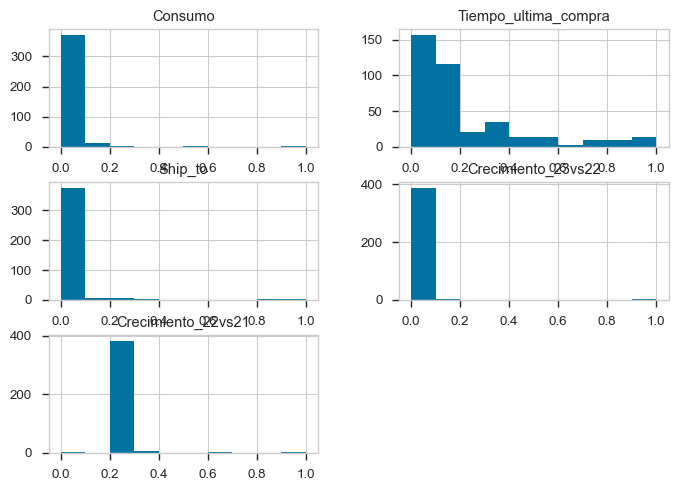

In [24]:
train[var].hist()

#### Ausentes

In [25]:
(train[var].isna().sum()/len(train)).to_frame()

,0
Consumo,0.0
Tiempo_ultima_compra,0.0
Ship_to,0.0
Crecimiento_23vs22,0.0
Crecimiento_22vs21,0.0


#### Extremos.

In [26]:
for v,li,ls in train[var].describe(percentiles=[0.01,0.99]).T[['1%','99%']].reset_index().values:
    train[f'ex_{v}'] = ((train[v]<li)|(train[v]>ls)).astype(int)

In [27]:
train['ex_'] = train.filter(like='ex_').max(axis=1)

In [28]:
train['ex_'].value_counts(1)

0    0.923077
1    0.076923
Name: ex_, dtype: float64

In [29]:
train = train[train['ex_']==0].reset_index(drop=True)

In [30]:
train.drop(train.filter(like='ex_').columns,axis=1,inplace=True)

array([[<Axes: title={'center': 'Consumo'}>,
        <Axes: title={'center': 'Tiempo_ultima_compra'}>],
       [<Axes: title={'center': 'Ship_to'}>,
        <Axes: title={'center': 'Crecimiento_23vs22'}>],
       [<Axes: title={'center': 'Crecimiento_22vs21'}>, <Axes: >]],
      dtype=object)

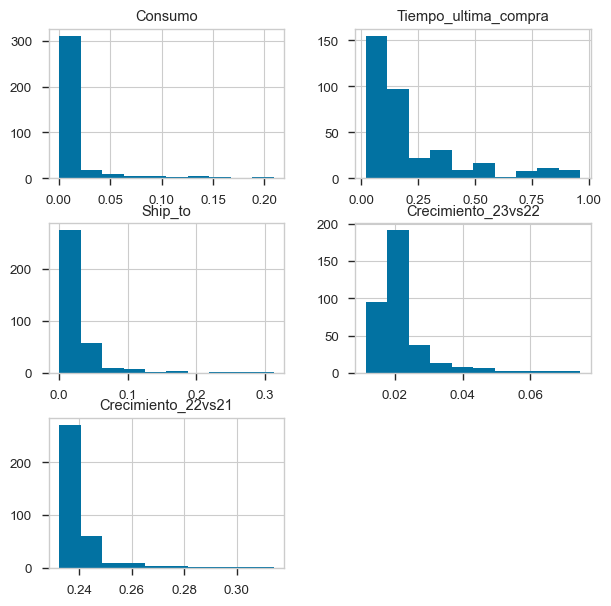

In [31]:
train[var].hist(figsize=(7,7))

In [32]:
train[var].describe(percentiles=[0.01,0.05,0.95,0.99])

,Consumo,Tiempo_ultima_compra,Ship_to,Crecimiento_23vs22,Crecimiento_22vs21
count,360.000000,360.000000,360.000000,360.000000,360.000000
mean,0.013620,0.210014,0.014323,0.023142,0.241282
std,0.029607,0.228432,0.037876,0.008949,0.009478
min,0.000386,0.019293,0.000000,0.011425,0.232312
1%,0.000509,0.019936,0.000000,0.013079,0.232312
5%,0.000661,0.022508,0.000000,0.013079,0.232312
50%,0.003396,0.118328,0.000000,0.023883,0.239246
95%,0.067413,0.793344,0.064063,0.038194,0.258961
99%,0.153686,0.959486,0.218750,0.060756,0.287484
max,0.208984,0.963344,0.312500,0.074804,0.314041


### Discreto.
#### Analisis de frecuencia.

In [33]:
def freq(data:pd.DataFrame,variables:list):
    if type(variables) is not list:
        variables = [variables]
    for v in variables:
        aux = data[v].value_counts().to_frame()
        aux.rename(columns={v:'FA'},inplace=True)
        aux['FR'] = aux['FA']/aux['FA'].sum()
        aux[['FAA','FRA']] = aux.cumsum()
        print(f"Tabla de frecuencias de la variable **{v}**\n\n")
        print(aux)
        print("\n")

In [34]:
print(pd.__version__)

1.5.3


In [35]:
freq(train,vard)

Tabla de frecuencias de la variable **Territorio**


        FA        FR  FAA       FRA
A4A42A  11  0.030556   11  0.030556
A5842A  11  0.030556   22  0.061111
A4742A   9  0.025000   31  0.086111
A9482C   8  0.022222   39  0.108333
A9582F   8  0.022222   47  0.130556
...     ..       ...  ...       ...
A9142L   1  0.002778  356  0.988889
A5342B   1  0.002778  357  0.991667
A5342G   1  0.002778  358  0.994444
A5542A   1  0.002778  359  0.997222
A9572G   1  0.002778  360  1.000000

[136 rows x 4 columns]


Tabla de frecuencias de la variable **Estado**


     FA        FR  FAA       FRA
JAL  42  0.116667   42  0.116667
MIC  39  0.108333   81  0.225000
CHP  25  0.069444  106  0.294444
GUA  24  0.066667  130  0.361111
SIN  23  0.063889  153  0.425000
TAM  22  0.061111  175  0.486111
PUE  21  0.058333  196  0.544444
COA  19  0.052778  215  0.597222
CAM  16  0.044444  231  0.641667
MEX  14  0.038889  245  0.680556
OAX  11  0.030556  256  0.711111
NLE   9  0.025000  265  0.736111
CMX   9  0.

#### Normalización

In [36]:
def normalizar(df:pd.DataFrame,var:str,umbral:float=0.05)->tuple:
    """Esta función normaliza una variable discreta basada en el 
    principio de umbral de representatividad estadística.

    Args:
        df (pd.DataFrame): datos con v.d. a normalizar
        var (str): nombre de la variable
        umbral (float, optional): umbral estadístico deseado. Defaults to 0.05.

    Returns:
        tuple: nombre de la variable y mapa de normalización
    """
    aux = df[var].value_counts(1).to_frame()
    aux['map'] = np.where(aux[var]<umbral,'Otros',aux.index)
    if aux.loc[aux['map']=='Otros'][var].sum()<umbral:
        aux['map'].replace({'Otros':aux.head(1)['map'].values[0]},inplace=True)
    aux.drop(var,axis=1,inplace=True)
    return var,aux['map'].to_dict()

In [37]:
print(train.columns.values)

['ID' 'y' 'Antiguedad' 'Volumen' 'Consumo' 'Ship_to' 'Frec'
 'Tiempo_ultima_compra' 'Devolucion' 'Venta_2020' 'Venta_2021'
 'Venta_2022' 'Venta_2023' 'Crecimiento_21vs20' 'Crecimiento_22vs21'
 'Crecimiento_23vs22' 'Territorio' 'Estado' 'Cliente_Nuevo'
 'Anio_Registro' 'Compra_unica' 'Material.Number' 'Temporada' 'SO' 'Churn'
 'Linea_Negocio']


In [38]:
type(train[vard])

pandas.core.frame.DataFrame

In [39]:
type(pd.Index(vard))

pandas.core.indexes.base.Index

In [40]:
list(map(lambda v: print(train.columns.values, "-", v), pd.Index(vard)))

['ID' 'y' 'Antiguedad' 'Volumen' 'Consumo' 'Ship_to' 'Frec'
 'Tiempo_ultima_compra' 'Devolucion' 'Venta_2020' 'Venta_2021'
 'Venta_2022' 'Venta_2023' 'Crecimiento_21vs20' 'Crecimiento_22vs21'
 'Crecimiento_23vs22' 'Territorio' 'Estado' 'Cliente_Nuevo'
 'Anio_Registro' 'Compra_unica' 'Material.Number' 'Temporada' 'SO' 'Churn'
 'Linea_Negocio'] - Territorio
['ID' 'y' 'Antiguedad' 'Volumen' 'Consumo' 'Ship_to' 'Frec'
 'Tiempo_ultima_compra' 'Devolucion' 'Venta_2020' 'Venta_2021'
 'Venta_2022' 'Venta_2023' 'Crecimiento_21vs20' 'Crecimiento_22vs21'
 'Crecimiento_23vs22' 'Territorio' 'Estado' 'Cliente_Nuevo'
 'Anio_Registro' 'Compra_unica' 'Material.Number' 'Temporada' 'SO' 'Churn'
 'Linea_Negocio'] - Estado
['ID' 'y' 'Antiguedad' 'Volumen' 'Consumo' 'Ship_to' 'Frec'
 'Tiempo_ultima_compra' 'Devolucion' 'Venta_2020' 'Venta_2021'
 'Venta_2022' 'Venta_2023' 'Crecimiento_21vs20' 'Crecimiento_22vs21'
 'Crecimiento_23vs22' 'Territorio' 'Estado' 'Cliente_Nuevo'
 'Anio_Registro' 'Compra_unica' 'Mat

[None, None, None, None, None, None, None, None, None, None]

In [41]:
mapa_norm = list(map(lambda v: normalizar(train, v), pd.Index(vard)))

In [42]:
for v, mapa in mapa_norm:
    train[f'n_{v}'] = train[v].replace(mapa)

In [43]:
varn = [v for v in train.columns if v[:2]=='n_']

In [44]:
train

,ID,y,Antiguedad,Volumen,Consumo,Ship_to,Frec,Tiempo_ultima_compra,Devolucion,Venta_2020,Venta_2021,Venta_2022,Venta_2023,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Territorio,Estado,Cliente_Nuevo,Anio_Registro,Compra_unica,Material.Number,Temporada,SO,Churn,Linea_Negocio,n_Territorio,n_Estado,n_Cliente_Nuevo,n_Anio_Registro,n_Compra_unica,n_Material.Number,n_Temporada,n_SO,n_Churn,n_Linea_Negocio
0,21107469,1,0.959868,0.002054,0.001494,0.00000,0.006561,0.335691,0.000000,0.025075,0.018876,0.012172,0.002928,0.022547,0.239246,0.013079,A5742M,SLP,False,2017,False,36926,OI,3CR,True,FG,Otros,Otros,False,2017,False,Otros,OI,3CR,True,FG
1,21362922,0,0.529582,0.002561,0.003014,0.00000,0.004834,0.084887,0.000000,0.017927,0.022467,0.011030,0.010453,0.027237,0.232312,0.023883,A5642J,NLE,False,2020,False,13175,OI,3CR,False,IN,Otros,Otros,False,2020,False,Otros,OI,3CR,False,IN
2,21107463,0,0.959868,0.048681,0.131237,0.03125,0.261740,0.137621,0.080357,0.292318,0.158019,0.199328,0.100545,0.024989,0.248899,0.021200,A9512J,PUE,False,2017,False,39966,OI,3CR,False,FG,Otros,PUE,False,2017,False,Otros,OI,3CR,False,FG
3,21532247,0,0.259826,0.001667,0.000602,0.00000,0.001381,0.040514,0.008929,0.017927,0.018876,0.011030,0.002928,0.027237,0.239246,0.023883,A5342S,JAL,False,2022,False,68372,OI,3CR,False,HS,Otros,JAL,False,2022,False,Otros,OI,3CR,False,HS
4,21109641,0,0.959868,0.003928,0.004316,0.00000,0.005525,0.117042,0.000000,0.031314,0.029410,0.011030,0.007005,0.026337,0.232312,0.023883,A4A42A,CMX,False,2017,False,55476,OI,3IS,False,FG,Otros,Otros,False,2017,False,Otros,OI,Otros,False,FG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,21108119,0,0.959868,0.001773,0.001137,0.00000,0.002417,0.118328,0.000000,0.017927,0.019925,0.012129,0.003988,0.027237,0.245146,0.028193,A5842A,CHP,False,2017,False,61365,OI,3CR,False,FG,Otros,CHP,False,2017,False,Otros,OI,3CR,False,FG
356,26021174,0,0.073645,0.002953,0.002357,0.00000,0.016575,0.136977,0.008929,0.017927,0.018876,0.011030,0.007546,0.027237,0.239246,0.023883,A9492C,SIN,False,2023,False,51369,OI,3CR,False,IN,Otros,SIN,False,2023,False,Otros,OI,3CR,False,IN
357,21109419,0,0.959868,0.002250,0.002020,0.00000,0.000691,0.099035,0.000000,0.017927,0.026139,0.011030,0.005472,0.027237,0.232312,0.023883,A4A42A,BCS,False,2017,False,59115,OI,3IS,False,IN,Otros,Otros,False,2017,False,Otros,OI,Otros,False,IN
358,21108511,0,0.959868,0.014444,0.021636,0.00000,0.108080,0.117042,0.008929,0.034551,0.037021,0.034501,0.035338,0.027804,0.248166,0.034709,A5442B,MEX,False,2017,False,36926,OI,3CR,False,FG,Otros,Otros,False,2017,False,Otros,OI,3CR,False,FG


In [45]:
freq(train,varn)

Tabla de frecuencias de la variable **n_Territorio**


        FA   FR  FAA  FRA
Otros  360  1.0  360  1.0


Tabla de frecuencias de la variable **n_Estado**


        FA        FR  FAA       FRA
Otros  145  0.402778  145  0.402778
JAL     42  0.116667  187  0.519444
MIC     39  0.108333  226  0.627778
CHP     25  0.069444  251  0.697222
GUA     24  0.066667  275  0.763889
SIN     23  0.063889  298  0.827778
TAM     22  0.061111  320  0.888889
PUE     21  0.058333  341  0.947222
COA     19  0.052778  360  1.000000


Tabla de frecuencias de la variable **n_Cliente_Nuevo**


        FA   FR  FAA  FRA
False  360  1.0  360  1.0


Tabla de frecuencias de la variable **n_Anio_Registro**


       FA        FR  FAA       FRA
2017  156  0.433333  156  0.433333
2021   49  0.136111  205  0.569444
2020   38  0.105556  243  0.675000
2022   37  0.102778  280  0.777778
2023   31  0.086111  311  0.863889
2019   30  0.083333  341  0.947222
2018   19  0.052778  360  1.000000


Tabla de frecuencias de la

#### Quitar Unarias (Sin varianza)

In [46]:
unarias = [v for v in varn if train[v].nunique()==1]

In [47]:
unarias

['n_Territorio', 'n_Cliente_Nuevo', 'n_Compra_unica', 'n_Temporada']

In [48]:
varn = [v for v in varn if v not in unarias]

In [49]:
train.drop(unarias,axis=1,inplace=True)

In [50]:
len(varn)

6

In [51]:
varn

['n_Estado',
 'n_Anio_Registro',
 'n_Material.Number',
 'n_SO',
 'n_Churn',
 'n_Linea_Negocio']

# Representación Vectorial.

In [52]:
oh = OneHotEncoder(drop='if_binary',sparse_output=False, handle_unknown='ignore')

In [53]:
oh.fit(train[varn])

OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False)

In [54]:
var_dummy = list(oh.get_feature_names_out())

In [55]:
train[var_dummy] = oh.transform(train[varn])

In [56]:
len(var+var_dummy)

29

array([[<Axes: title={'center': 'Consumo'}>,
        <Axes: title={'center': 'Tiempo_ultima_compra'}>,
        <Axes: title={'center': 'Ship_to'}>,
        <Axes: title={'center': 'Crecimiento_23vs22'}>,
        <Axes: title={'center': 'Crecimiento_22vs21'}>],
       [<Axes: title={'center': 'n_Estado_CHP'}>,
        <Axes: title={'center': 'n_Estado_COA'}>,
        <Axes: title={'center': 'n_Estado_GUA'}>,
        <Axes: title={'center': 'n_Estado_JAL'}>,
        <Axes: title={'center': 'n_Estado_MIC'}>],
       [<Axes: title={'center': 'n_Estado_Otros'}>,
        <Axes: title={'center': 'n_Estado_PUE'}>,
        <Axes: title={'center': 'n_Estado_SIN'}>,
        <Axes: title={'center': 'n_Estado_TAM'}>,
        <Axes: title={'center': 'n_Anio_Registro_2017'}>],
       [<Axes: title={'center': 'n_Anio_Registro_2018'}>,
        <Axes: title={'center': 'n_Anio_Registro_2019'}>,
        <Axes: title={'center': 'n_Anio_Registro_2020'}>,
        <Axes: title={'center': 'n_Anio_Registro_2021

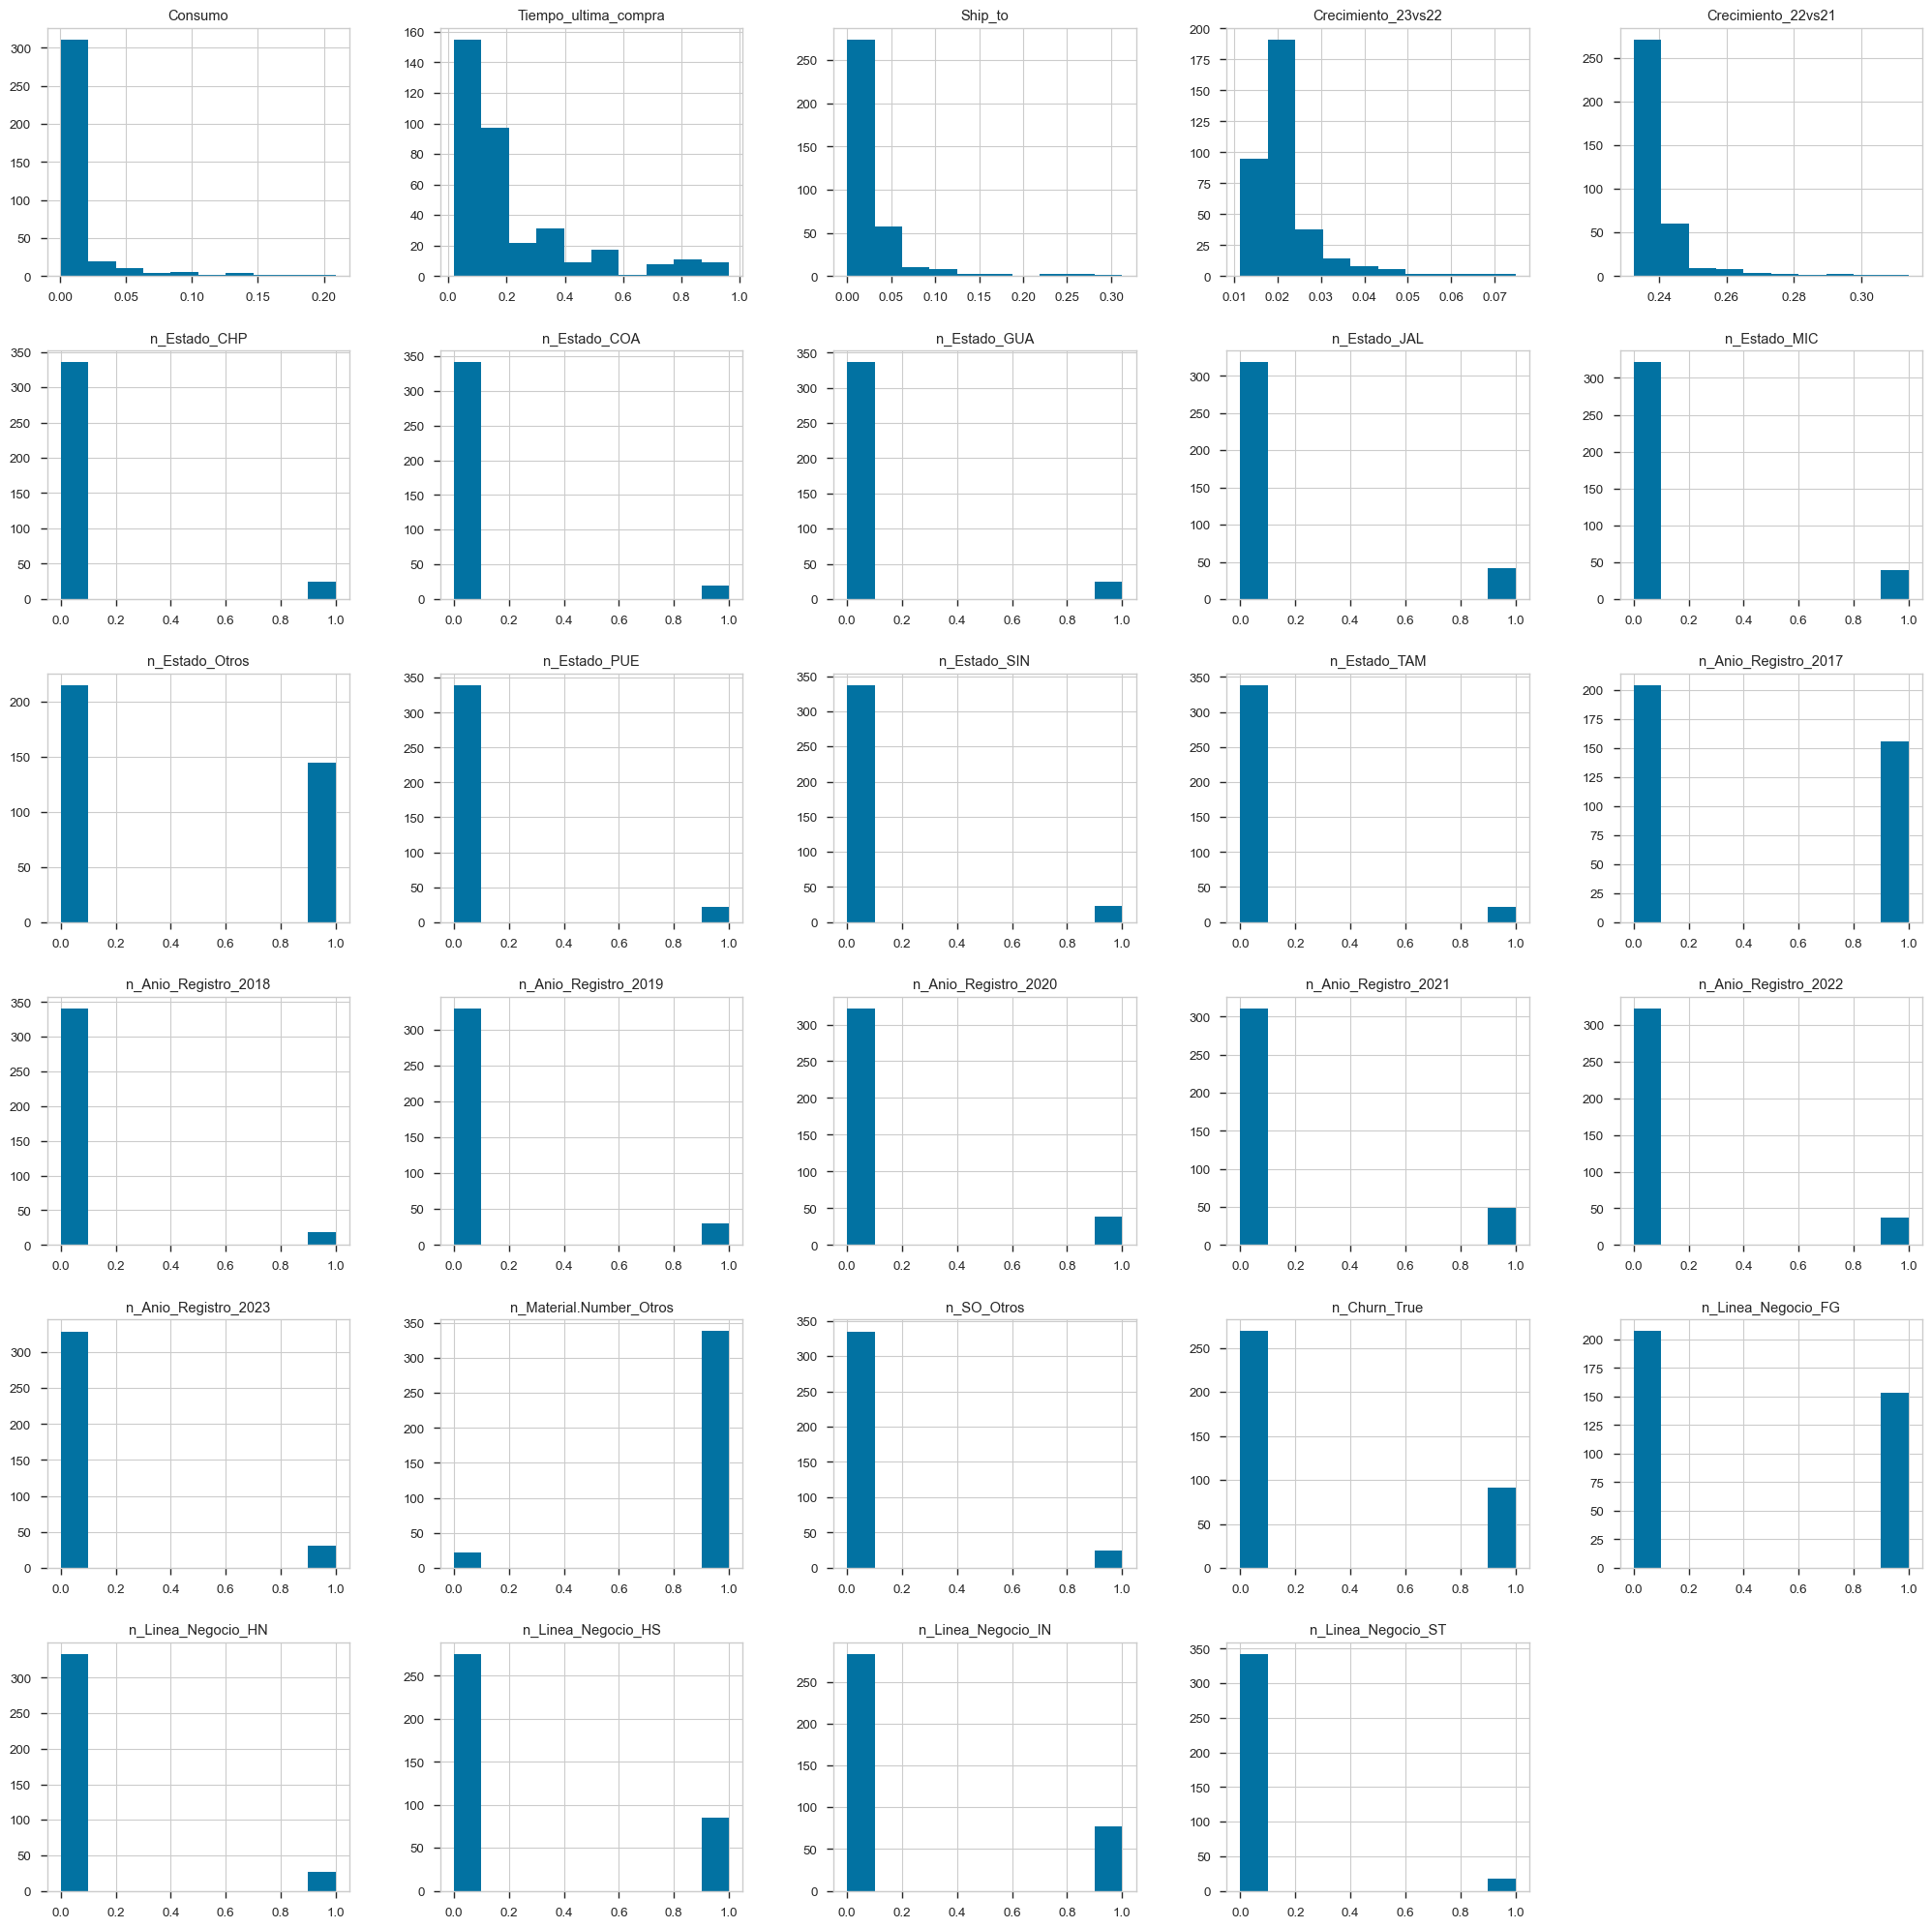

In [57]:
train[var+var_dummy].hist(figsize=(25,25))

# Extraemos la información procesada.

# Análisis de poder predictivo

In [58]:
#sk = SelectKBest(k=len(var+var_dummy))
sk = SelectKBest(k=6)

In [59]:
sk.fit(train[var+var_dummy], train['y'])

c:\Users\carlo\Syngenta\Projects for Analysis - General\my_env\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning:

divide by zero encountered in divide



SelectKBest(k=6)

In [60]:
pd.Series(dict(zip(sk.get_feature_names_out(),sk.scores_))).sort_values(ascending=False).iplot(kind='bar',color='purple')

In [61]:
best = [v for v,d in zip(var+var_dummy,sk.get_support()) if d ]

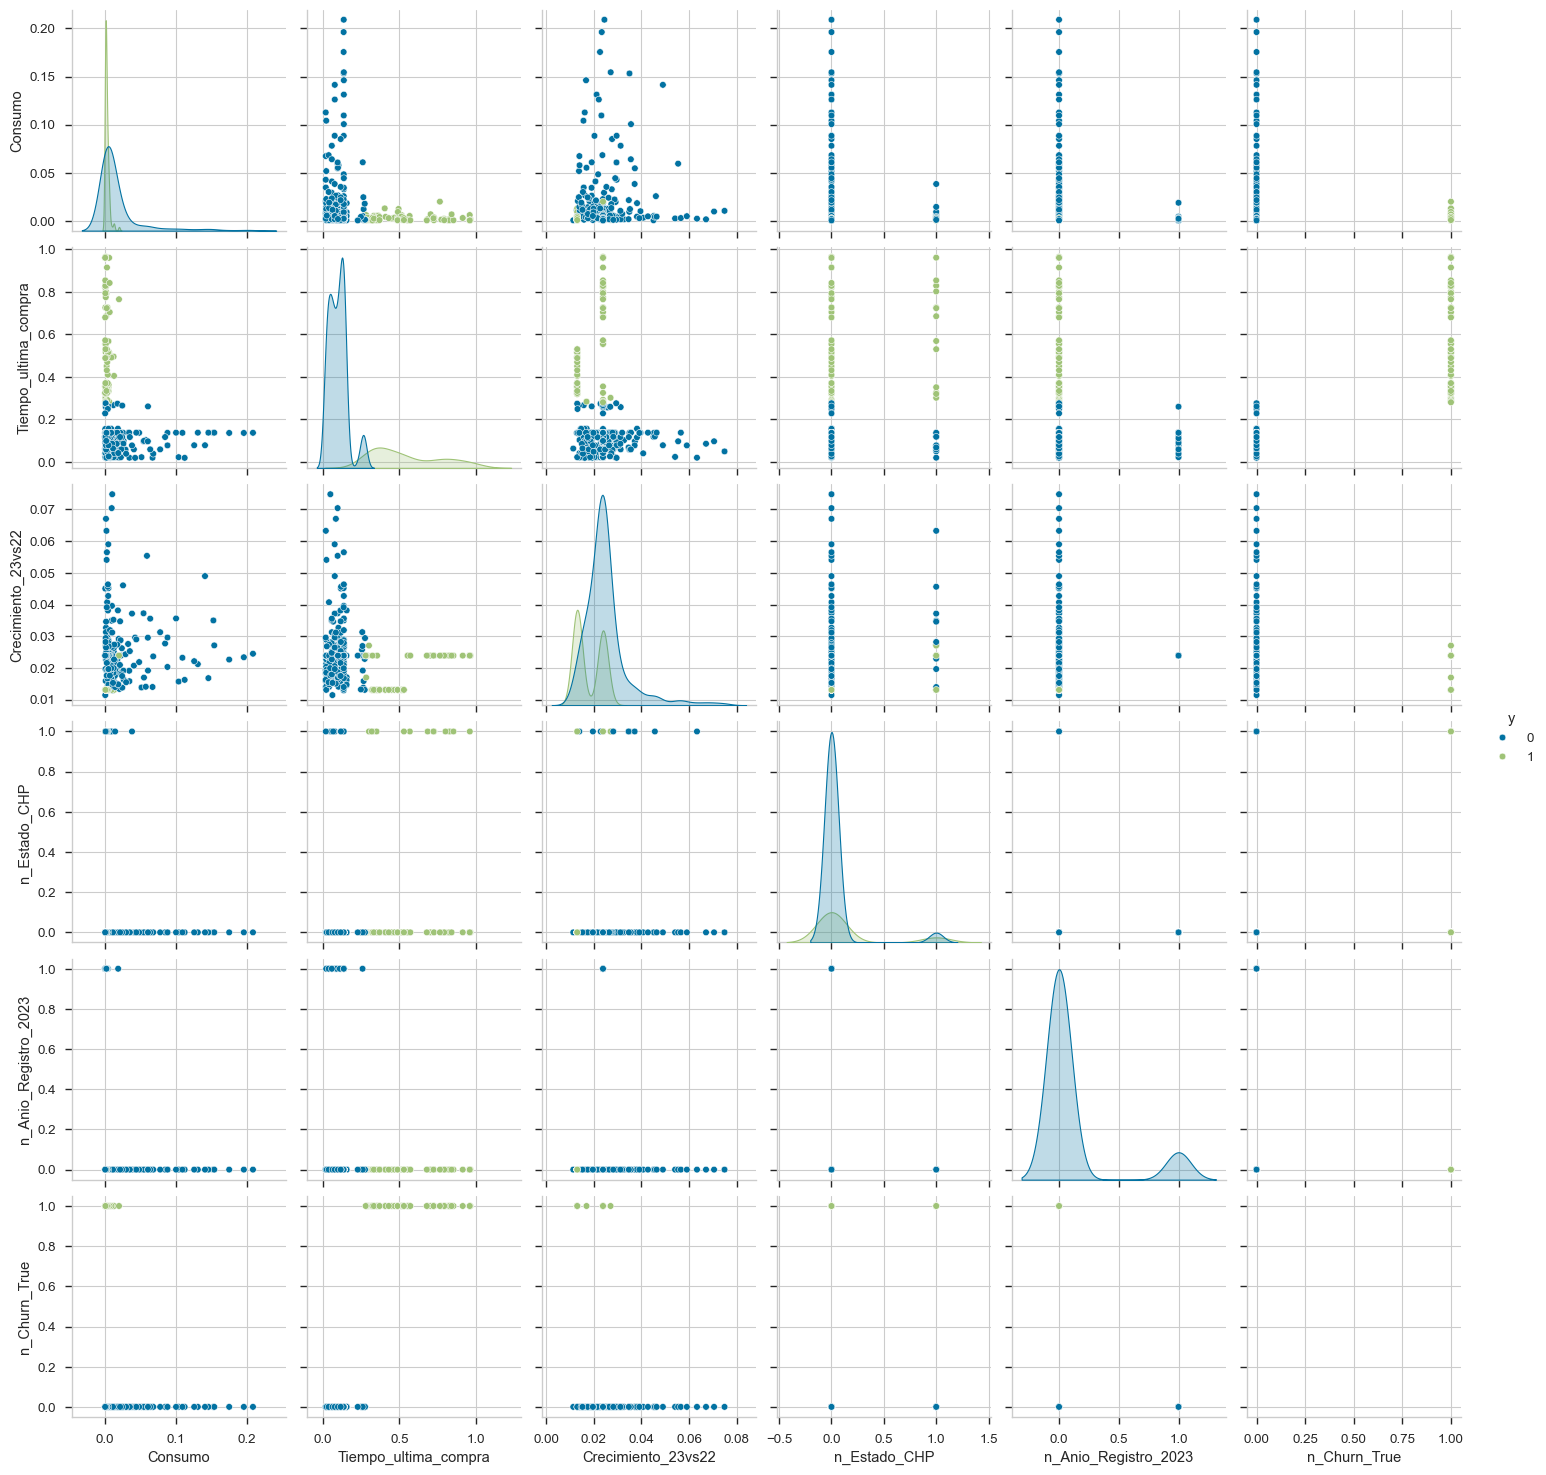

In [62]:
sns.pairplot(data=train[best+['y']],hue='y')

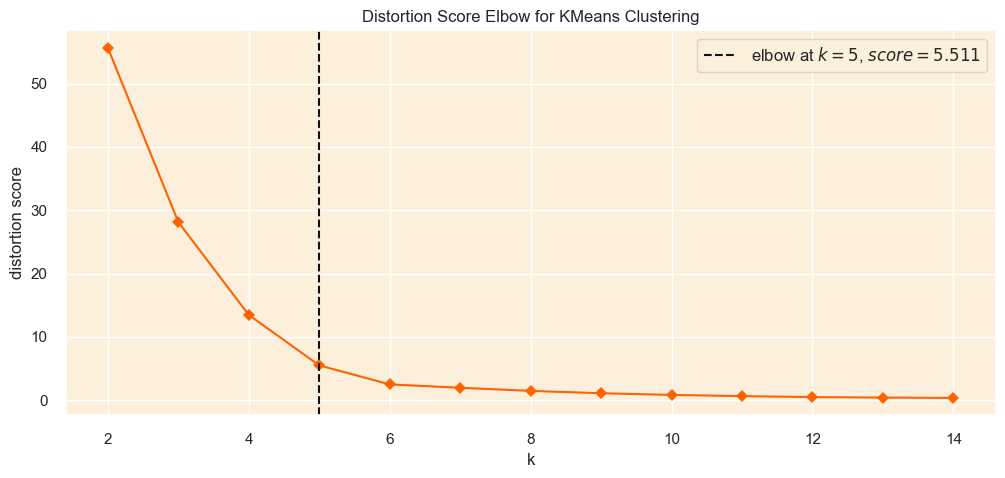

In [63]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(train[best])

# Finalize and render the figure
visualizer.show();

In [64]:
n_k=visualizer.elbow_value_

In [65]:
clus= AgglomerativeClustering(n_clusters=n_k, linkage="ward").fit(train[best])

In [66]:
md_h = pd.Series(clus.labels_)

Text(0, 0.5, 'Número de vinos del cluster')

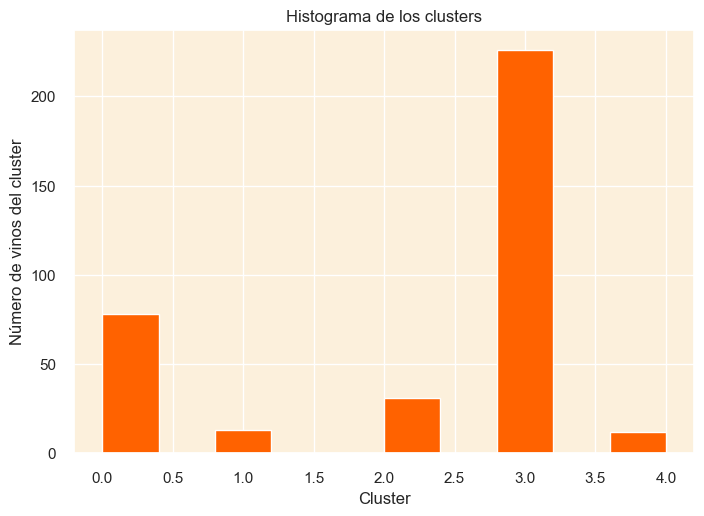

In [67]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Cluster")
plt.ylabel("Número de vinos del cluster")

In [68]:
md_h

0      0
1      3
2      3
3      3
4      3
      ..
355    4
356    2
357    3
358    3
359    3
Length: 360, dtype: int64

In [69]:
clus.children_

array([[154, 264],
       [115, 272],
       [ 13, 216],
       [ 16, 199],
       [274, 310],
       [251, 290],
       [237, 309],
       [259, 356],
       [208, 238],
       [ 49, 364],
       [ 20, 362],
       [ 79, 187],
       [143, 344],
       [ 83, 366],
       [  3, 108],
       [ 18, 156],
       [144, 246],
       [177, 285],
       [263, 331],
       [256, 361],
       [363, 369],
       [300, 371],
       [190, 365],
       [ 21, 281],
       [ 70, 377],
       [110, 178],
       [ 19, 215],
       [ 95,  97],
       [122, 170],
       [ 86, 348],
       [  1, 168],
       [167, 225],
       [125, 162],
       [198, 260],
       [ 17, 211],
       [150, 380],
       [ 12, 172],
       [245, 306],
       [102, 376],
       [288, 388],
       [277, 374],
       [ 74, 117],
       [ 92, 119],
       [228, 387],
       [152, 398],
       [146, 282],
       [370, 381],
       [336, 391],
       [ 91, 234],
       [334, 346],
       [367, 378],
       [268, 357],
       [ 61,

In [70]:
Z = linkage(train[best], "ward")

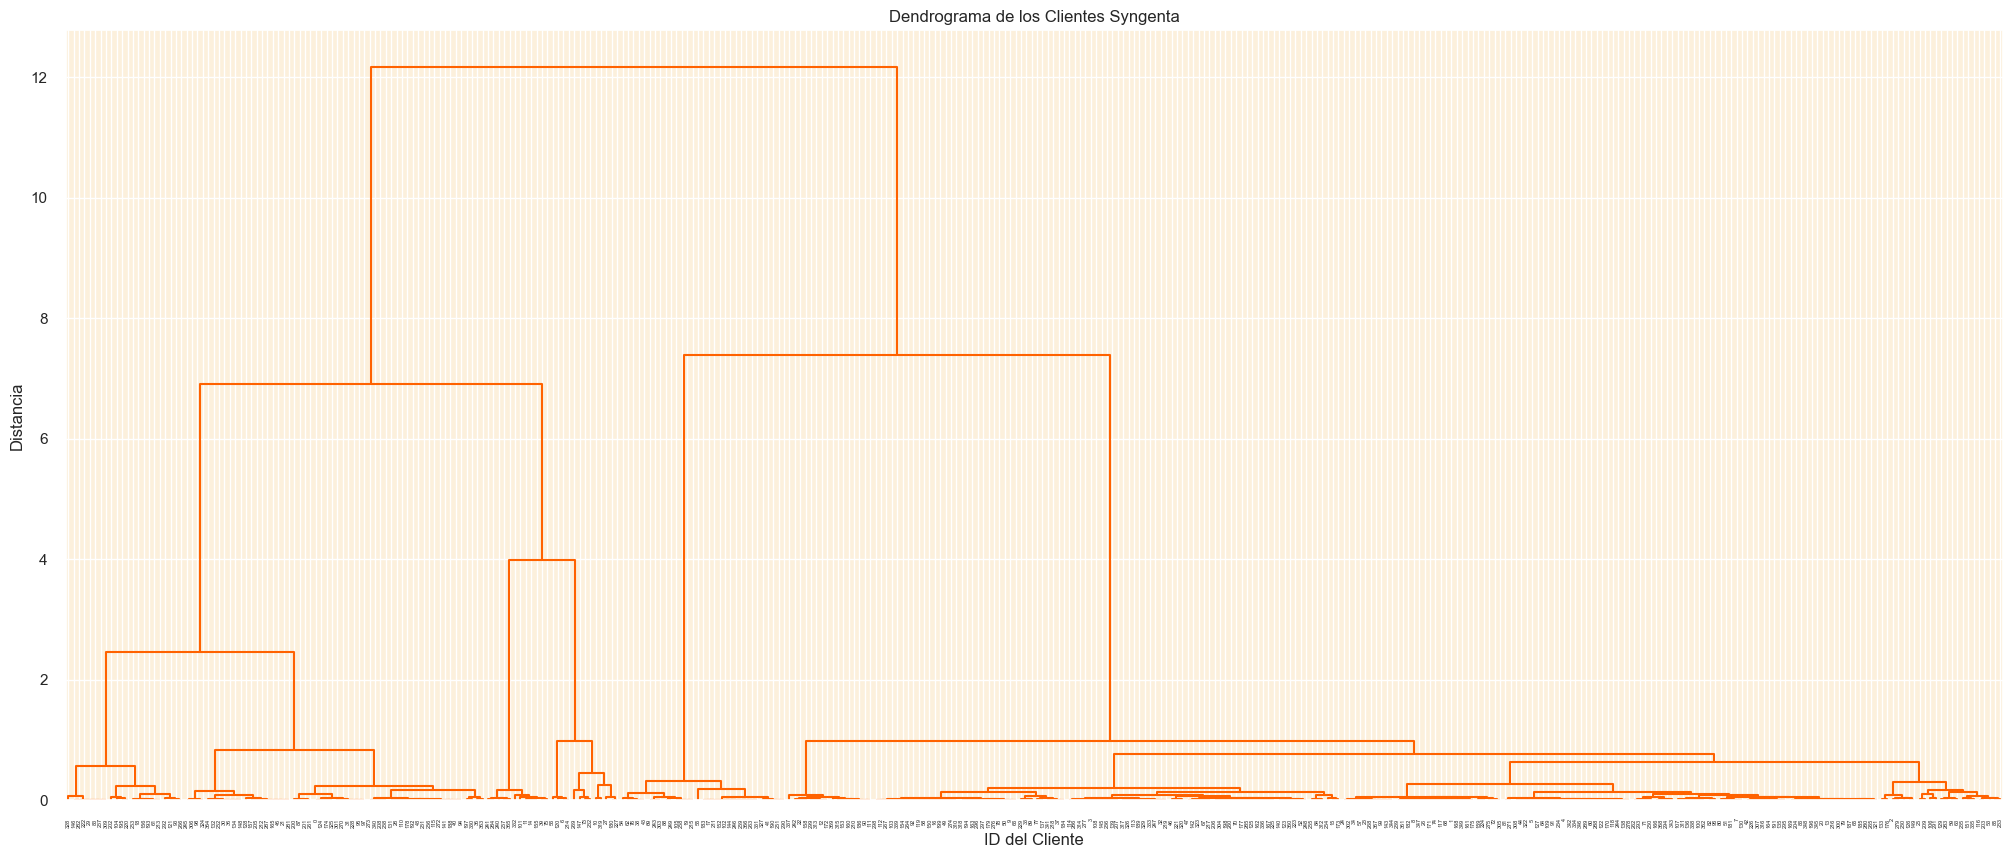

In [71]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los Clientes Syngenta")
plt.xlabel("ID del Cliente")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=4.)
plt.show()

In [72]:
train[best]

,Consumo,Tiempo_ultima_compra,Crecimiento_23vs22,n_Estado_CHP,n_Anio_Registro_2023,n_Churn_True
0,0.001494,0.335691,0.013079,0.0,0.0,1.0
1,0.003014,0.084887,0.023883,0.0,0.0,0.0
2,0.131237,0.137621,0.021200,0.0,0.0,0.0
3,0.000602,0.040514,0.023883,0.0,0.0,0.0
4,0.004316,0.117042,0.023883,0.0,0.0,0.0
...,...,...,...,...,...,...
355,0.001137,0.118328,0.028193,1.0,0.0,0.0
356,0.002357,0.136977,0.023883,0.0,1.0,0.0
357,0.002020,0.099035,0.023883,0.0,0.0,0.0
358,0.021636,0.117042,0.034709,0.0,0.0,0.0


In [73]:
model = KMeans(n_clusters=n_k)
model.fit(train[best])

KMeans(n_clusters=5)

In [74]:
model.labels_

array([2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 4, 0, 0, 4, 0, 0, 3, 2, 3, 0, 2,
       0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 3, 4, 2, 3, 0, 3,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 0, 4, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       3, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 0, 0, 4, 3, 0, 2, 3, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 2, 1, 2, 0, 0, 0, 3, 0,
       0, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 0, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 2, 2, 0, 2, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 2, 2, 1, 3, 0, 0, 0, 0,
       2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 2, 0, 4, 4,
       0, 3, 0, 2, 3, 0, 0, 3, 0, 3, 2, 2, 0, 0, 2, 4, 3, 3, 0, 2, 0, 3,
       0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0,
       0, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,

In [75]:
md_k = pd.Series(model.labels_)

In [76]:
train["clust_h"] = md_h
train["clust_k"] = md_k

In [77]:
train.head()

,ID,y,Antiguedad,Volumen,Consumo,Ship_to,Frec,Tiempo_ultima_compra,Devolucion,Venta_2020,Venta_2021,Venta_2022,Venta_2023,Crecimiento_21vs20,Crecimiento_22vs21,Crecimiento_23vs22,Territorio,Estado,Cliente_Nuevo,Anio_Registro,Compra_unica,Material.Number,Temporada,SO,Churn,Linea_Negocio,n_Estado,n_Anio_Registro,n_Material.Number,n_SO,n_Churn,n_Linea_Negocio,n_Estado_CHP,n_Estado_COA,n_Estado_GUA,n_Estado_JAL,n_Estado_MIC,n_Estado_Otros,n_Estado_PUE,n_Estado_SIN,n_Estado_TAM,n_Anio_Registro_2017,n_Anio_Registro_2018,n_Anio_Registro_2019,n_Anio_Registro_2020,n_Anio_Registro_2021,n_Anio_Registro_2022,n_Anio_Registro_2023,n_Material.Number_Otros,n_SO_Otros,n_Churn_True,n_Linea_Negocio_FG,n_Linea_Negocio_HN,n_Linea_Negocio_HS,n_Linea_Negocio_IN,n_Linea_Negocio_ST,clust_h,clust_k
0,21107469,1,0.959868,0.002054,0.001494,0.00000,0.006561,0.335691,0.000000,0.025075,0.018876,0.012172,0.002928,0.022547,0.239246,0.013079,A5742M,SLP,False,2017,False,36926,OI,3CR,True,FG,Otros,2017,Otros,3CR,True,FG,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0,2
1,21362922,0,0.529582,0.002561,0.003014,0.00000,0.004834,0.084887,0.000000,0.017927,0.022467,0.011030,0.010453,0.027237,0.232312,0.023883,A5642J,NLE,False,2020,False,13175,OI,3CR,False,IN,Otros,2020,Otros,3CR,False,IN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3,0
2,21107463,0,0.959868,0.048681,0.131237,0.03125,0.261740,0.137621,0.080357,0.292318,0.158019,0.199328,0.100545,0.024989,0.248899,0.021200,A9512J,PUE,False,2017,False,39966,OI,3CR,False,FG,PUE,2017,Otros,3CR,False,FG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3,0
3,21532247,0,0.259826,0.001667,0.000602,0.00000,0.001381,0.040514,0.008929,0.017927,0.018876,0.011030,0.002928,0.027237,0.239246,0.023883,A5342S,JAL,False,2022,False,68372,OI,3CR,False,HS,JAL,2022,Otros,3CR,False,HS,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3,0
4,21109641,0,0.959868,0.003928,0.004316,0.00000,0.005525,0.117042,0.000000,0.031314,0.029410,0.011030,0.007005,0.026337,0.232312,0.023883,A4A42A,CMX,False,2017,False,55476,OI,3IS,False,FG,Otros,2017,Otros,Otros,False,FG,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3,0


(array([226.,   0.,  13.,   0.,   0.,  78.,   0.,  31.,   0.,  12.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

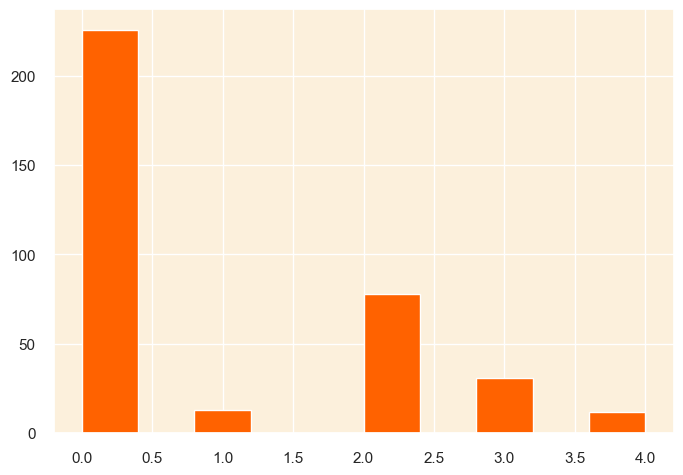

In [78]:
plt.hist(md_k)

In [79]:
model.cluster_centers_

array([[ 1.98818760e-02,  9.73792789e-02,  2.47024654e-02,
        -1.24900090e-16,  1.52655666e-16, -5.55111512e-17],
       [ 1.63831315e-03,  6.13405887e-01,  2.08025769e-02,
         1.00000000e+00, -2.77555756e-17,  1.00000000e+00],
       [ 2.95573386e-03,  5.30629071e-01,  1.74229243e-02,
        -5.55111512e-17, -2.77555756e-17,  1.00000000e+00],
       [ 2.12016102e-03,  1.02644954e-01,  2.38827755e-02,
         2.77555756e-17,  1.00000000e+00, -1.11022302e-16],
       [ 7.69426826e-03,  8.76741693e-02,  3.15623223e-02,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [80]:
model.inertia_

5.510752351419056

In [81]:
varc.append('clust_k')

In [82]:
def generar_colores_aleatorios(n_k):
    """
    Genera una lista de códigos de colores aleatorios en formato hexadecimal.

    Args:
        n_k (int): Longitud deseada de la lista.

    Returns:
        list: Lista de códigos de colores aleatorios.
    """
    colores = []
    for _ in range(n_k):
        # Generar un color aleatorio en formato hexadecimal (#RRGGBB)
        color = "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        colores.append(color)
    return colores

colors = generar_colores_aleatorios(n_k)

In [83]:
# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, color=color, alpha=0.4)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=20, color=color, y=1.1)

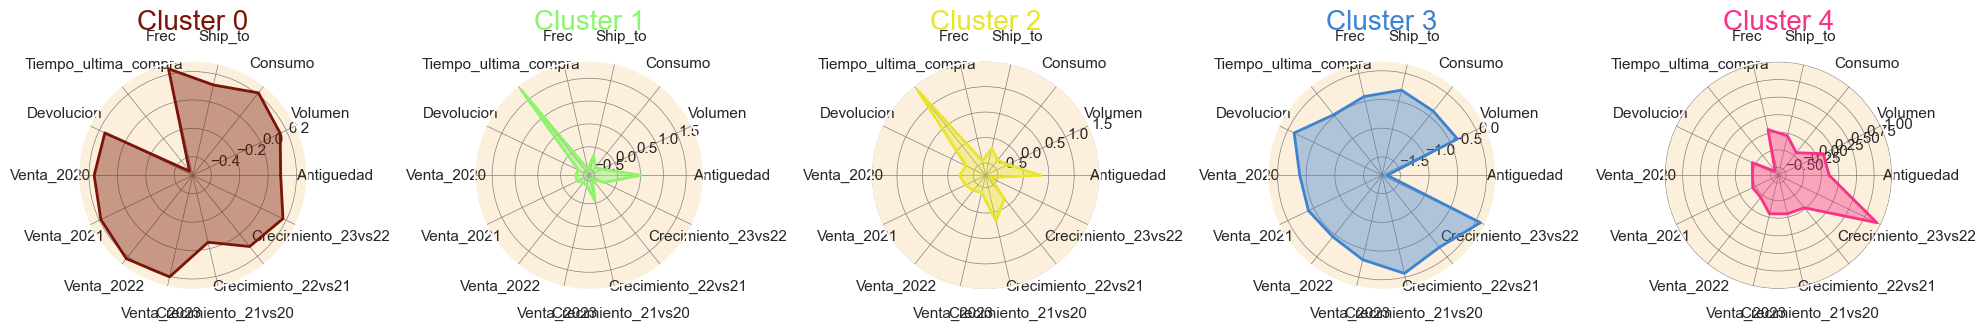

In [85]:
# Establecer 'CustomerID' como índice y asignarlo a un nuevo dataframe
df_customer = train[um + varc].set_index('ID')

# Estandarizar los datos (excluyendo la columna de clusters)
scaler = StandardScaler()
df_customer_standardized = scaler.fit_transform(df_customer.drop(columns=['clust_k'], axis=1))

# Crear un nuevo dataframe con los valores estandarizados y agregar la columna de clusters
df_customer_standardized = pd.DataFrame(df_customer_standardized, columns=df_customer.columns[:-1], index=df_customer.index)
df_customer_standardized['clust_k'] = df_customer['clust_k']

# Calcular los centroides de cada cluster
cluster_centroids = df_customer_standardized.groupby('clust_k').mean()

# Configurar los datos para la gráfica de radar
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Inicializar la figura y los subplots
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(polar=True), nrows=1, ncols=n_k)

# Crear gráficas de radar para cada cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Completar el bucle
    create_radar_chart(ax[i], angles, data, color, i)

    # Configurar etiquetas y agregar una cuadrícula
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1])
    ax[i].grid(color='grey', linewidth=0.5)

# Mostrar la gráfica
plt.tight_layout()
plt.show()